# 1. Data Extraction

In [8]:
import numpy as np
import pandas as pd


file_data = np.loadtxt(r'C:\Users\CLL\Documents\Github\Ce888 Assignment\Ce888Assignment\3.yacht\yacht_hydrodynamics.data', usecols=(0,1,2,3,4,5,6))

data = pd.DataFrame()
data['long_pos']= file_data[:,0]
data['prism_coef']= file_data[:,1]
data['len_disprt']= file_data[:,2]
data['beam_drt']= file_data[:,3]
data['len_beamrt']= file_data[:,4]
data['Fnumber']= file_data[:,5]
data['Resistance']= file_data[:,6]
print(data.columns)
data.to_csv('data_yacht1.csv')

Index(['long_pos', 'prism_coef', 'len_disprt', 'beam_drt', 'len_beamrt',
       'Fnumber', 'Resistance'],
      dtype='object')


# 2. Preprocessing

In [9]:
import pandas as pd
data = pd.read_csv('data_yacht1.csv')
data.describe()
data.drop(['Unnamed: 0'],axis=1).describe()

,long_pos,prism_coef,len_disprt,beam_drt,len_beamrt,Fnumber,Resistance
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
Unnamed: 0    308 non-null int64
long_pos      308 non-null float64
prism_coef    308 non-null float64
len_disprt    308 non-null float64
beam_drt      308 non-null float64
len_beamrt    308 non-null float64
Fnumber       308 non-null float64
Resistance    308 non-null float64
dtypes: float64(7), int64(1)
memory usage: 19.3 KB


In [11]:
X = (data.drop(['Resistance','Unnamed: 0'],axis=1))
import seaborn as sns
import matplotlib.pyplot as plt # Plotting
#################
ax = sns.boxplot(data=X, orient="h", palette="Set2")
ax.set_title('X variables')

Text(0.5, 1.0, 'X variables')

# 3. Analysis

Decision Tree Analysis

In [29]:
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree
from sklearn.linear_model import SGDRegressor #to get the SGDRegressor
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict # To generate evaluation metrices
from sklearn.model_selection import cross_val_score # To generate evaluation metrices

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,data['Resistance'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#Initialise a Decision Tree with maximum depth of 3
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

(246, 6)
(62, 6)


Crossvalidation Coefficient of determination on training set : 0.9881098605415716




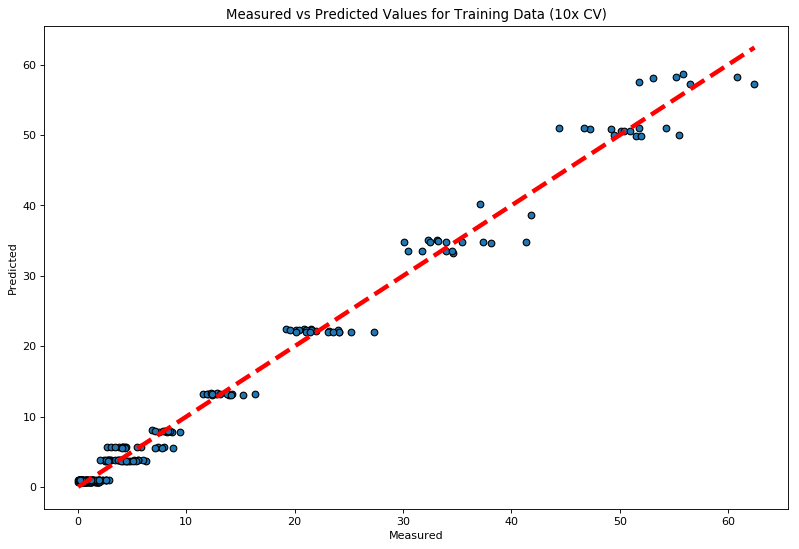

Coefficient of determination on test set:  0.9891666699847904

Mean Squared Error on test set : 1.5635992080673373


In [31]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

# Fit the model and predict
dtRegressor.fit(X_train,y_train)
y_predicted = dtRegressor.predict(X_test)

# Model Performance on test data
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

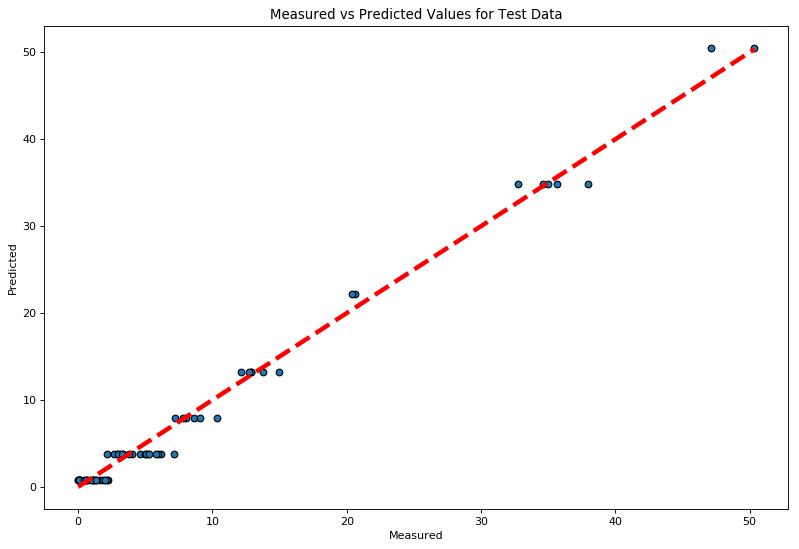

In [32]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

[5 1 4 3 2 0] [0.         0.00356799 0.         0.         0.         0.99643201]


Text(0.5, 1.0, 'Variable Importance')

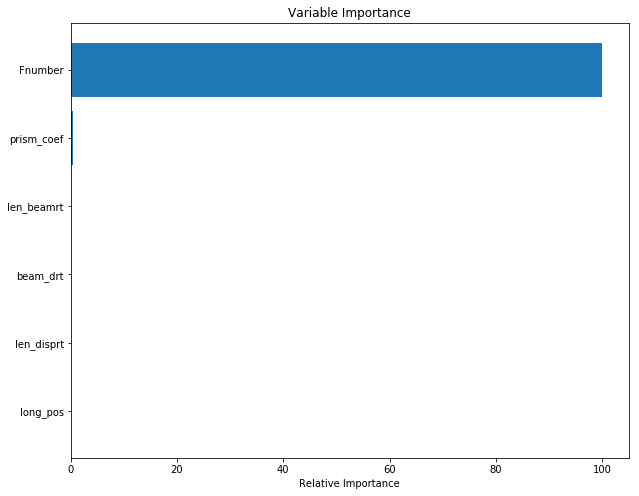

In [33]:
feature_names = X.columns
importances = dtRegressor.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices,importances)

# #############################################################################
# Plot feature importance
feature_importance = dtRegressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

SGD Regressor

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of 
Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around 
zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, 
it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [34]:
#Scale the numeric variables to avoid 
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X[['long_pos', 'prism_coef', 'len_disprt', 'beam_drt', 'len_beamrt',
#        'Fnumber']]= scaler.fit_transform(X[['long_pos', 'prism_coef', 'len_disprt', 'beam_drt', 'len_beamrt',
#        'Fnumber']])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,data['Resistance'],test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

#SGD Regressor with L1 penalty
SGDReg = SGDRegressor(loss='squared_loss', penalty='l1', alpha=0.0001,
                 l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, 
                 shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling',
                 eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1,
                 n_iter_no_change=5, warm_start=False, average=False)

(246, 6)
(62, 6)


Crossvalidation Coefficient of determination on training set : 0.6009938685071456




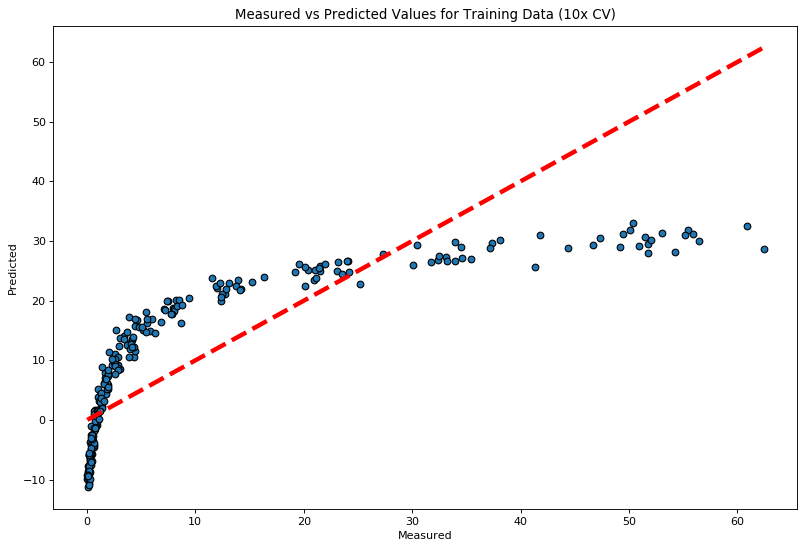

In [36]:
#Model Performance in Train Data
CV_predicted = cross_val_predict(SGDReg, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(SGDReg, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")

# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

In [37]:
# Fit the model and predict
SGDReg.fit(X_train,y_train)
y_predicted = SGDReg.predict(X_test)

# Model Performance on test data
r2_score = SGDReg.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.5058192277124545

Mean Squared Error on test set : 71.3262370024797


In [38]:
coef = SGDReg.coef_
intercept = SGDReg.intercept_
print('Intercept: {}'.format(intercept))

# No iterables are passed
result = zip()

# Converting itertor to list
resultList = list(result)
print(resultList)

# Two iterables are passed
result = zip(X, coef)

# Converting itertor to set
resultSet = set(result)
print(resultSet)

Intercept: [11.04143376]
[]
{('Fnumber', 12.637852695811327), ('beam_drt', -0.08733077471154406), ('len_beamrt', -0.45657003392445294), ('len_disprt', -0.17750980469914812), ('prism_coef', -0.4754866338874579), ('long_pos', 0.6245543133562336)}
